# 1. Linear Regression
### 공부 시간에 따른 시험 점수

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [27]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [28]:
X = dataset.iloc[:, :-1].values #처음부터 마지막 colummn 직전까지의 데이터
y = dataset.iloc[:, -1].values #마지막 colummn data

In [29]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체 생성
reg.fit(X, y) # 학습 모델 생성

LinearRegression()

In [31]:
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

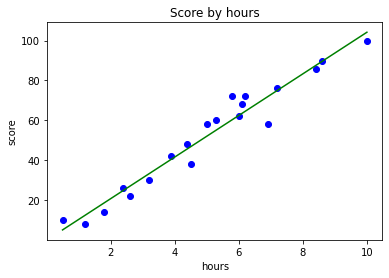

In [32]:
plt.scatter(X, y, color = 'blue')
plt.plot(X, y_pred, color = 'green') #선그래프
plt.title("Score by hours")
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [33]:
print('9시간 공부했을 때 예상 점수 : ', reg.predict([[9]])) #2차원 배열 형태

9시간 공부했을 때 예상 점수 :  [93.77478776]


In [34]:
print(reg.predict([[9], [8], [7]]))

[93.77478776 83.33109082 72.88739388]


In [37]:
reg.coef_ #기울기

array([10.44369694])

In [38]:
reg.intercept_ #b

-0.21848470286721522

### 데이터 세트 분리

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [43]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) #

In [46]:
X, len(X) #전체 데이터 X, 개수

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [47]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [48]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [49]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [50]:
y_test, len(y_test)

(array([ 90,   8, 100,  38], dtype=int64), 4)

### 분리된 데이터를 통한 modeling

In [51]:
from sklearn.linear_model import LinearRegression
reg.fit(X_train, y_train)

LinearRegression()

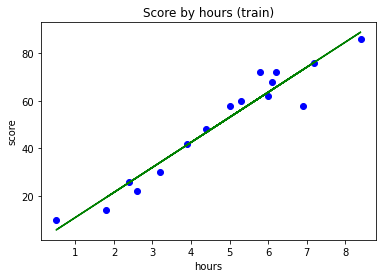

In [53]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, reg.predict(X_train), color = 'green') #선그래프
plt.title("Score by hours (train)")
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

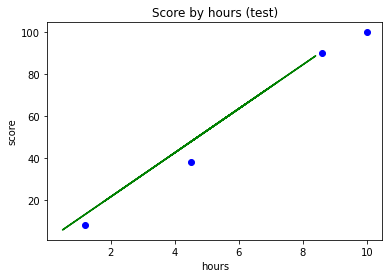

In [54]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, reg.predict(X_train), color = 'green') 
plt.title("Score by hours (test)")
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [55]:
reg.coef_

array([10.49161294])

In [56]:
reg.intercept_

0.6115562905169796

### 모델 평가

In [57]:
reg.score(X_test, y_test)

0.9727616474310156

In [58]:
reg.score(X_train, y_train)

0.9356663661221668

## Gradient Descent

In [78]:
from sklearn.linear_model import SGDRegressor

# sr = SGDRegressor(max_iter=200, eta0=1e-4, random_state=0, verbose=1) #max_iter : epoch 횟수, eta0 : learning rate

sr = SGDRegressor()
sr.fit(X_train, y_train)

SGDRegressor()

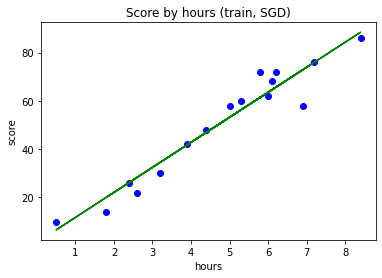

In [61]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, sr.predict(X_train), color = 'green') #선그래프
plt.title("Score by hours (train, SGD)")
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [62]:
sr.coef_, sr.intercept_

(array([10.3600607]), array([1.36889794]))

In [63]:
sr.score(X_test, y_test)

0.9721415558670029

In [64]:
sr.score(X_train, y_train)

0.9354844082104717